In [1]:
import sys
import tensorflow
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential 
from keras import optimizers

from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense,Conv2D, MaxPooling2D
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time
from PIL import Image

Using TensorFlow backend.


In [2]:
#Default dimensions we found online
img_width, img_height = 224, 224 
 
#Create a bottleneck file
top_model_weights_path = 'bottle_model.h5'
# loading up our datasets
train_data_dir = r'data\train'       
validation_data_dir = r'data\validation'
test_data_dir = r'data\test'
 
# number of epochs to train top model 
epochs = 4 
#this has been changed after multiple model run 
# batch size used by flow_from_directory and predict_generator 
batch_size = 2 

In [3]:
#Loading vgc16 model
vgg16 = applications.VGG16(include_top=False, weights='imagenet')
datagen = ImageDataGenerator(rescale=1. / 255) 
#needed to create the bottleneck .npy files

In [ ]:
#__this can take an hour and half to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_train_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_train = int(math.ceil(nb_train_samples / batch_size))
 
bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train) 
 
np.save('bottle_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time:' , elapsed)

Found 623 images belonging to 2 classes.


C:\Users\Ghulam mohammad\AppData\Roaming\Python\Python37\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
#__this can take an hour and half to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__
start = datetime.datetime.now()
#testing file
 
generator = datagen.flow_from_directory( 
    test_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_test_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_test = int(math.ceil(nb_test_samples / batch_size)) 
 
bottleneck_features_test = vgg16.predict_generator(generator, predict_size_test) 
 
np.save('bottle_test.npy', bottleneck_features_test)
end= datetime.datetime.now()
elapsed= end-start
print ('Time:' , elapsed)

In [ ]:
#__this can take an hour and half to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__
start = datetime.datetime.now()
 #validation files
generator = datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_validation_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size)) 
 
bottleneck_features_validation = vgg16.predict_generator(generator, predict_size_validation) 
 
np.save('bottle_validation.npy', bottleneck_features_validation)
end= datetime.datetime.now()
elapsed= end-start
print ('Time:' , elapsed)

In [4]:
#training data
generator_top = datagen.flow_from_directory( 
   train_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
train_data = np.load('bottle_train.npy') 
 
# get the class labels for the training data, in the original order 
train_labels = generator_top.classes 
#print(train_labels)
# convert the training labels to categorical vectors 
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 623 images belonging to 2 classes.


In [5]:
print(train_labels.shape)
print(train_data.shape)

(623, 2)
(623, 7, 7, 512)


In [12]:
#testing data
generator_top = datagen.flow_from_directory( 
   test_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
test_data = np.load('bottle_test.npy') 
 
# get the class labels for the training data, in the original order 
test_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 200 images belonging to 2 classes.


In [ ]:
test_labels.shape

In [6]:
#validationdata
generator_top = datagen.flow_from_directory( 
   validation_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
validation_data = np.load('bottle_validation.npy') 
 
# get the class labels for the training data, in the original order 
validation_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 201 images belonging to 2 classes.


In [14]:
print(validation_labels.shape)

(201, 2)


In [15]:
print(train_data.shape)
print(train_labels.shape)

(623, 7, 7, 512)
(623, 2)


In [18]:
print(train_data.shape)
print(bottleneck_features_train.shape)
train_data.shape[1:]

(623, 7, 7, 512)


NameError: name 'bottleneck_features_train' is not defined

In [7]:
#This is the best model we found. For additional models, check out I_notebook.ipynb
start = datetime.datetime.now()
model = Sequential() 
# 32  number of output filters in the convolution
# (3,3) the height and width of the 2D convolution window
model.add(Conv2D(32, (3, 3), input_shape = train_data.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2))) # it reduce the dimension size


model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.5)) 
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))
##############3
#model.add(Dense(1, activation='sigmoid'))
###########3
#print(num_classes)
#print(train_data.shape)
model.compile(loss='categorical_crossentropy',
   optimizer=optimizers.RMSprop(lr=1e-4),
   metrics=['acc'])
history = model.fit(train_data, train_labels, 
   epochs=10,###epochs
   batch_size=batch_size, 
   validation_data=(validation_data, validation_labels))

model.save_weights(top_model_weights_path)
(eval_loss, eval_accuracy) = model.evaluate( 
    validation_data, validation_labels, batch_size=batch_size,     verbose=1)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("[INFO] Loss: {}".format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

C:\software\Anaconda3\lib\site-packages\keras\activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 623 samples, validate on 201 samples
Epoch 1/10
623/623 [==============================] - 4s 6ms/step - loss: 0.4636 - acc: 0.7753 - val_loss: 0.3076 - val_acc: 0.8458
Epoch 2/10
623/623 [==============================] - 2s 4ms/step - loss: 0.2795 - acc: 0.8780 - val_loss: 0.2769 - val_acc: 0.8856
Epoch 3/10
623/623 [==============================] - 2s 4ms/step - loss: 0.2370 - acc: 0.9117 - val_loss: 0.2647 - val_acc: 0.9154
Epoch 4/10
623/623 [==============================] - 2s 4ms/step - loss: 0.2111 - acc: 0.9230 - val_loss: 0.2844 - val_acc: 0.9055
Epoch 5/10
623/623 [==============================] - 2s 4ms/step - loss: 0.1667 - acc: 0.9470 - val_loss: 0.2713 - val_acc: 0.9204
Epoch 6/10
623/623 [==============================] - 2s 4ms/step - loss: 0.1627 - acc: 0.9631 - val_loss: 0.2605 - val_acc: 0.9254
Epoch 7/10
623/623 [==============================] - 2s 4ms/step - loss: 0.1359 - acc: 0.9647 - val_loss: 0.3877 - val_acc: 0.9104
Epoch 8/10
623/623 [==========

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 5, 5, 32)          147488    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               12900     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)               

[INFO] loading and preprocessing image…
[[0.650654   0.34934595]]
ID: 0, Label: damage 65.07%
ID: 1, Label: fixed 34.93%
Final Decision:
.
..
...
{'damage': 0, 'fixed': 1}
ID: 0, Label: damage


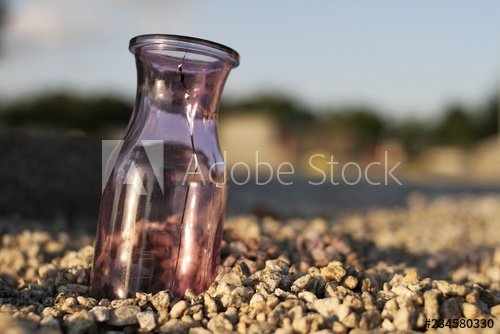

In [16]:
def read_image(file_path):
    print('[INFO] loading and preprocessing image…') 
    image = load_img(file_path, target_size=(224, 224)) 
    image = img_to_array(image) 
    image = np.expand_dims(image, axis=0)
    image /= 255. 
    return image
def test_single_image(path):
    bottles = ['damage','fixed']
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = vgg16.predict(images) 
    preds = model.predict_proba(bt_prediction)
    print(preds)
    for idx, bottle, x in zip(range(0,6), bottles , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, bottle, round(x*100,2) ))
        #if(round(x*100,2) > 65):
         #   print('\nNot Other')
    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    class_predicted = model.predict_classes(bt_prediction)
    class_dictionary = generator_top.class_indices 
    print(class_dictionary)
    inv_map = {v: k for k, v in class_dictionary.items()} 
    print("ID: {}, Label: {}".format(class_predicted[0],  inv_map[class_predicted[0]])) 
    return load_img(path)

path = 'test/d54.jpg'
test_single_image(path)

In [ ]:




end